In [1]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve


['./validation_set/NRS_scores_human.tab', './validation_set/PRS_scores_yeast.tab', './validation_set/NRS_scores_yeast.tab', './validation_set/PRS_scores_human.tab']
./validation_set/NRS_scores_human.tab


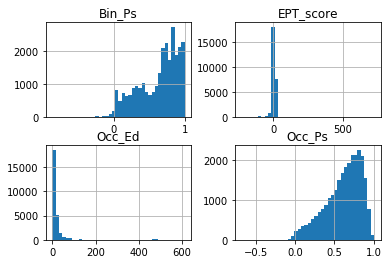

./validation_set/PRS_scores_yeast.tab


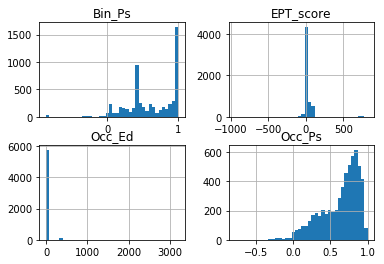

./validation_set/NRS_scores_yeast.tab


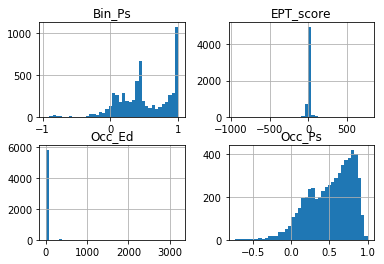

./validation_set/PRS_scores_human.tab


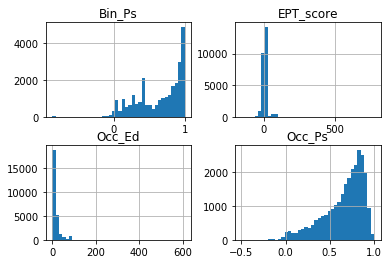

In [2]:
tabs =glob.glob('./validation_set/*.tab')
print(tabs)
yeast_dfs=[]
human_dfs=[]

hists = 'EPT_score Occ_Ed Occ_Ps Bin_Ps'.split()
for tab in tabs:
    print(tab)
    df = pd.read_csv(tab, sep ='\t' )
    df[hists].hist( bins = 40)
    plt.show()
    
    if 'PRS' in tab:
        df['truth'] =  1
    if 'NRS' in tab:
        df['truth']  = 0
    if 'human' in tab:
        human_dfs.append(df)    
    if 'yeast' in tab:
        yeast_dfs.append(df)

    
humandf = pd.concat(human_dfs)
yeastdf = pd.concat(yeast_dfs)
datasets=[humandf,yeastdf]  

EPT_score
Occ_Ed
Occ_Ps
Bin_Ps


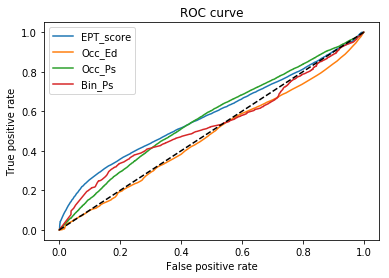

EPT_score
Occ_Ed
Occ_Ps
Bin_Ps


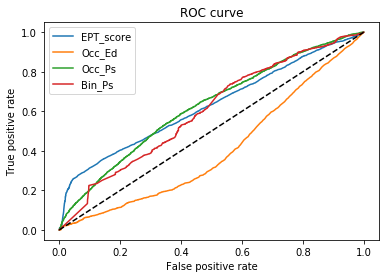

In [3]:

plt.figure(1)
for alldfs in datasets:
    for score in hists:
        print(score)
        sub = alldfs[[score,'truth']]
        y_test = sub.truth
        y_pred = alldfs[score]
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        plt.plot(fpr, tpr, label=score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title( 'ROC curve')
    plt.legend(loc='best')

    plt.show()


EPT_score
Occ_Ed
Occ_Ps
Bin_Ps


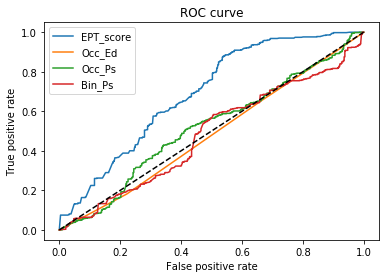

EPT_score
Occ_Ed
Occ_Ps
Bin_Ps


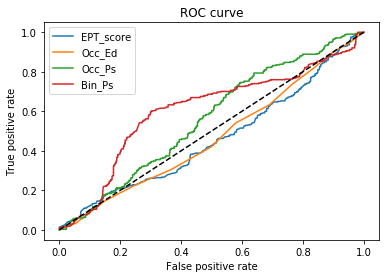

In [4]:

#take 500 best positive and negative
for alldfs in datasets:
    for score in hists:
        print(score)
        sub = alldfs[[score,'truth']]   
        sub = sub.sort_values(score, axis = 0 , ascending=True)
        sub = sub.iloc[0:1000]
        #sub1 = sub.iloc[0:500]
        #sub2 = sub.iloc[-500:]
        #sub = pd.concat([sub1,sub2])
        
        
        
        y_test = sub.truth
        y_pred = sub[score]
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        plt.plot(fpr, tpr, label=score)
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()


EPT_score
Occ_Ed
Occ_Ps
Bin_Ps


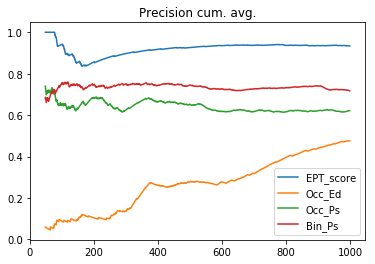

EPT_score
Occ_Ed
Occ_Ps
Bin_Ps


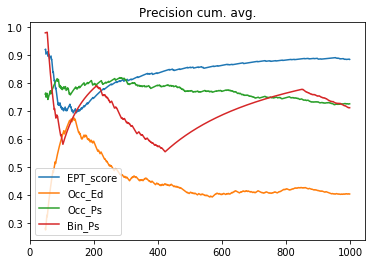

In [5]:
for alldfs in datasets:
    for score in hists:
        print(score)
        sub = alldfs[[score,'truth']]   
        sub = sub.sort_values(score, axis = 0 , ascending=False)
        sub = sub.iloc[0:1000]
        
        sub['mean'+score] = sub.truth.expanding(min_periods=50).mean()
        plt.plot(range(len(sub)), sub['mean'+score], label=score)
    plt.title('Precision cum. avg.')
    plt.legend(loc='best')
    plt.show()
    

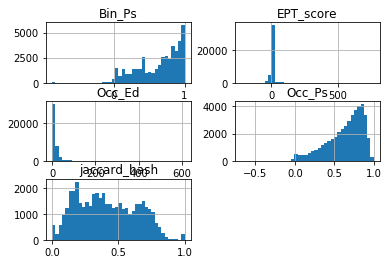

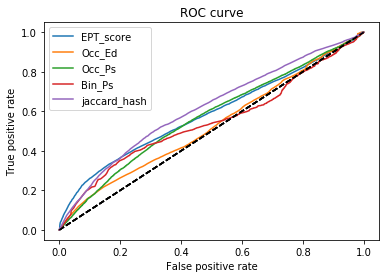

EPT_score
Occ_Ed
Occ_Ps
Bin_Ps
jaccard_hash


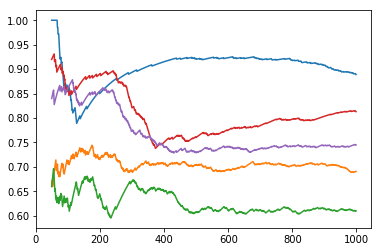

In [4]:
hists = 'EPT_score Occ_Ed Occ_Ps Bin_Ps jaccard_hash'.split()

totaldf = pd.read_csv('./validation_set/human_scores.csv')
#totaldf = pd.read_csv('./validation_set/yeast_real_scores.csv')

totaldf[hists].hist( bins = 40 )
totaldf['Occ_Ed'] = - totaldf['Occ_Ed'] 
plt.show()

for score in hists:
    sub = totaldf[[score,'truth']]   
    sub = sub.sort_values(score, axis = 0 , ascending=True)
    #sub = sub.iloc[0:1000]
    #sub1 = sub.iloc[0:500]
    #sub2 = sub.iloc[-500:]
    #sub = pd.concat([sub1,sub2])

    

    y_test = sub.truth
    y_pred = (sub[score]  - sub[score].min()) / (sub[score].max() - sub[score].min()) 
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
plt.show()


for score in hists:
    print(score)
    sub = totaldf[[score,'truth']]   
    sub = sub.sort_values(score, axis = 0 , ascending=False)
    sub = sub.iloc[0:1000]
    sub['mean'+score] = sub.truth.expanding(min_periods=50).mean()
    plt.plot(range(len(sub)), sub['mean'+score], label=score)
plt.show()



In [ ]:
#todo keras opt score

